In [1]:
#IMPORTING LIBRARIES

import torch
import clip
import numpy as numpy
from PIL import Image
import os
import pandas as pd
import urllib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#INITIATE CLIP MODEL

device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

In [4]:
#CONTENT MODERATION CONTEXT

        #EXPLICIT NUDITY & SUGGESTIVE CONTEXT
flags_map ={'EXPLICIT NUDITY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'EXPLICIT NUDITY'},
            
         'SENSUAL': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SENSUAL'},
            
         'EROTICA': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'EROTICA'},
            
         'TOPLESS WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'TOPLESS WOMAN'},
            
        'SEXY & HOT WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SEXY & HOT WOMAN'},
            
         #SEXY AND HOT WOMAN WEARS CONTEXT    
        'BEACH COSTUM WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BEACH COSTUM WORE WOMAN'},
            
        'BIKINI WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BIKINI WORE WOMAN'},
            
        'SWIMWEAR WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SWIMWEAR WORE WOMAN'},
            
        'LINGERIE WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'LINGERIE WORE WOMAN'},
            
        'BUSTY WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BUSTY WORE WOMAN'},
            
        'BABYDOLL WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BABYDOLL WORE WOMAN'},
            
        'BODYSUIT WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BODYSUIT WORE WOMAN'},
            
        'BODY SHORTS WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BODY SHORTS WORE WOMAN'},
            
        'BUSTIER WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BUSTIER WORE WOMAN'},
            
        'G-STRING THONG WORE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'G-STRING THONG WORE WOMAN'},
          
          #NUDE BREAST EXPOSING CONTEXT  
         'NUDE BREAST SHOWING WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'NUDE BREAST SHOWING WOMAN'},
            
         'BREAST SURGERY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BREAST SURGERY'},
            
         'NUDE NIPPLE WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'NUDE NIPPLE WOMAN'},
            
        'BOOBS EXPOSING WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BOOBS WORE WOMAN'},
          
          #NUDE BUTTS EXPOSING CONTEXT
         'NUDE BUTT SHOWING UP WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'NUDE BUTT SHOWING UP WOMAN'},
            
         'SENSUAL ART': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SENSUAL ART'},
            
         #SEXY THIGH EXPOSING CONTEXT
         'NUDE THIGH SHOWING WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'NUDE THIGH SHOWING WOMAN'},
        
         #CHEST EXPOSING MAN CONTEXT   
        'SHIRTLESS MEN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SHIRTLESS MEN'},
        
        'NUDE CHEST MEN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'NUDE CHEST MEN'},    
        
        'BARED CHEST MEN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BARED CHEST MEN'},
        
        'HALF-NUDE MEN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'HALF-NUDE MEN'},
        
        'BARECHESTED MEN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BARECHESTED MEN'},
            
         #MORE SPECIFICE CONTEXT   
        'BIKINI WORE WOMAN ON THE BEACH': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BIKINI WORE WOMAN ON THE BEACH'},
        
        'BIKINI WORE PREGNANT WOMAN': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'BIKINI WORE PREGNANT WOMAN'},
        
        'SEXY HOT WOMAN WORE BIKINI & BRA': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SEXY HOT WOMAN WORE BIKINI & BRA'},
        
        'WOMEN EXPOSING SEXY BODY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'WOMEN EXPOSING SEXY BODY'},
            
        'WOMENS EXPOSING SEXY BODY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'WOMENS EXPOSING SEXY BODY'},
            
        'WOMENS EXPOSING SEXY BODY AND TAKING SELFEI': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'WOMENS EXPOSING SEXY BODY AND TAKING SELFEI'},
        
        'SEXY WOMENS IN COSPLAY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SEXY WOMENS IN COSPLAY'},
        
        'SEXY WORE WOMEN EXPOSING SEXY BODY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SEXY WORE WOMEN EXPOSING SEXY BODY'},
        
        'SEXY WOMEN SWIMMING': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SEXY WOMEN SWIMMING'},
            
        'SEXY WOMEN WORE BIKINI EXPOSING SEXY BODY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'SEXY WOMEN WORE BIKINI EXPOSING SEXY BODY'},
        
         'WOMEN BODYBUILDER IN BIKINI': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'WOMEN BODYBUILDER IN BIKINI'},

        'NAKED WOMEN BODYBUILDER': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'NAKED WOMEN BODYBUILDER'},

        'IMAGES CONTAINS SEX TOY': 
         {'DISPLAY': 'EXPLICIT NUDITY & SUGGESTIVE', 'CONTEXT': 'IMAGES CONTAINS SEX TOY'},

#ALCOHOL
        'IMAGE CONTAINS ALCOHOL': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS ALCOHOL'},
            
        'IMAGE CONTAINS WINE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WINE'},
            
        'IMAGE CONTAINS CHAMPAGNE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS CHAMPAGNE'},
            
        'IMAGE CONTAINS BEER': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER'},
            
        'IMAGE CONTAINS BEER TIN CANS': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER TIN CANS'},
            
        'IMAGE CONTAINS WHISKEY': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WHISKEY'},
            
         'IMAGE CONTAINS SCOTCH': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS SCOTCH'},
            
         'IMAGE CONTAINS COCKTAIL': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS COCKTAIL'},
            
        #IMAGE CONTAINS BOTTLE   
        'IMAGE CONTAINS ALCOHOL BOTTLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS ALCOHOL BOTTLE'},
            
        'IMAGE CONTAINS WINE BOTTLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WINE BOTTLE'},
           
        'IMAGE CONTAINS CHAMPAGNE BOTTLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS CHAMPAGNE BOTTLE'},
            
        'IMAGE CONTAINS BEER BOTTLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER BOTTLE'},
            
        #IMAGE CONTAINS GLASS   
        'IMAGE CONTAINS ALCOHOL GLASS': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS ALCOHOL GLASS'},
            
        'IMAGE CONTAINS WINE GLASS': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WINE GLASS'},
           
        'IMAGE CONTAINS CHAMPAGNE GLASS': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS CHAMPAGNE GLASS'},
            
        'IMAGE CONTAINS BEER GLASS': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER GLASS'},
        
        #IMAGE CONTAINS BOTTLE ON THE TABLE   
         'IMAGE CONTAINS ALCOHOL BOTTLE ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS ALCOHOL BOTTLE ON THE TABLE'},
            
        'IMAGE CONTAINS WINE BOTTLE ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WINE BOTTLE ON THE TABLE'},
            
        'IMAGE CONTAINS CHAMPAGNE BOTTLE ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS CHAMPAGNE BOTTLE ON THE TABLE'},
            
        'IMAGE CONTAINS BEER BOTTLE ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER BOTTLE ON THE TABLE'},
            
        'IMAGE CONTAINS BEER TIN CANS ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER TIN CANS ON THE TABLE'},
            
        #IMAGE CONTAINS GLASS ON THE TABLE   
         'IMAGE CONTAINS ALCOHOL GLASS ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS ALCOHOL GLASS ON THE TABLE'},
            
        'IMAGE CONTAINS WINE GLASS ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WINE GLASS ON THE TABLE'},
            
        'IMAGE CONTAINS CHAMPAGNE GLASS ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS CHAMPAGNE GLASS ON THE TABLE'},
            
        'IMAGE CONTAINS BEER GLASS ON THE TABLE': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER GLASS ON THE TABLE'},
            
        #IMAGE CONTAINS BOTTLE HOLDING IN HAND
        'IMAGE CONTAINS ALCOHOL BOTTLE HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS ALCOHOL BOTTLE HOLDING IN HAND'},
            
        'IMAGE CONTAINS WINE BOTTLE HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WINE BOTTLE HOLDING IN HAND'},
            
         'IMAGE CONTAINS CHAMPAGNE BOTTLE HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS CHAMPAGNE BOTTLE HOLDING IN HAND'},
            
         'IMAGE CONTAINS BEER BOTTLE HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER BOTTLE HOLDING IN HAND'},
            
        'IMAGE CONTAINS BEER TIN CANS HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER TIN CANS HOLDING IN HAND'},
        
        #IMAGE CONTAINS GLASS HOLDING IN HAND
        'IMAGE CONTAINS ALCOHOL GLASS HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS ALCOHOL GLASS HOLDING IN HAND'},
            
        'IMAGE CONTAINS WINE GLASS HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS WINE GLASS HOLDING IN HAND'},
            
         'IMAGE CONTAINS CHAMPAGNE GLASS HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS CHAMPAGNE GLASS HOLDING IN HAND'},
            
         'IMAGE CONTAINS BEER GLASS HOLDING IN HAND': 
         {'DISPLAY': 'ALCOHOL', 'CONTEXT': 'IMAGE CONTAINS BEER GLASS HOLDING IN HAND'},

#DRUGS & TOBACCO
         'TOBACCO': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'TOBACCO'},
         'CIGARETTE': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'CIGARETTE'},
         'E-CIGARETTE': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'E-CIGARETTE'},
         'CIGAR': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'CIGAR'},
         'SMOKING CIGARETTE': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'SMOKING CIGARETTE'},
         'CIGARETTE SMOKING': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'CIGARETTE SMOKING'},
         'NICOTINE': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'NICOTINE'},
         'MARIJUANA': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'MARIJUANA'},
         'CANNABIS': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'CANNABIS'},
         'CANNABIS SATIVA': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'CANNABIS SATIVA'},
         'WEED': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'WEED'},
         'HEMP': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'HEMP'},
         'HOOKAH': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'HOOKAH'},
         'CHILLUM': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'CHILLUM'},
         'SMOKING HOOKAH': 
         {'DISPLAY': 'DRUGS & TOBACCO', 'CONTEXT': 'SMOKING HOOKAH'},

#VIOLENCE & VISUALLY DISTURBING
         'VIOLENCE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'VIOLENCE'},
         'CRIME': 
         {'THCANNABIS SATIVA WITH IMAGERESHOLD': float, 'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'CRIME'},
         'WEAPONS': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'WEAPONS'},
         'FIREARMS': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'FIREARMS'},
         'GUN': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'GUN'},
         'LONG GUNS': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'LONG GUNS'},
         'SHOTGUN': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'SHOTGUN'},
         'KNIFE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'KNIFE'},
         'BIGGER KNIFE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BIGGER KNIFE'},
         'SWORD': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'SWORD'},
         'BATTLEAXE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BATTLEAXE'},
         'HATCHET': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'HATCHET'},
         'BATTLE WAR': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BATTLE WAR'},
         'WORLD WAR': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'WORLD WAR'},
         'IMAGE CONTAINS TERRORIST HOLDING GUN ARMS IN HAND': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'IMAGE CONTAINS TERRORIST HOLDING GUN ARMS IN HAND'},
         'PROTEST': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'PROTEST'},
         'BLOODY': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BLOODY'},
         'BLEEDING': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BLEEDING'},
         'FIGHT': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'FIGHT'},
         'ASSAULT': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'ASSAULT'},
         'HORROR': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'HORROR'},
         'ACCIDENT': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'ACCIDENT'},
         'AIRPLANE CRASH': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'AIRPLANE CRASH'},
         'HELICOPTER CRASH': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'HELICOPTER CRASH'},
         'INJURY': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'INJURY'},
         'WOUND': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'WOUND'},
         'MURDER': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'MURDER'},
         'CORPSE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'CORPSE'},
         'GORE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'GORE'},
         'SLAUGHTER': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'SLAUGHTER'},
         'MASSACRE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'MASSACRE'},
         'SUICIDE': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'SUICIDE'},
         'CAPITAL PUNISHMENT': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'CAPITAL PUNISHMENT'},
         'MEDICAL TREATMENT': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'MEDICAL TREATMENT'},
         'HOSPITAL TREATMENT': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'HOSPITAL TREATMENT'},
         'FACIAL SURGERY': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'FACIAL SURGERY'},
         'AUTOPSY': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'AUTOPSY'},
         'SKELETON': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'SKELETON'},
         'BOMB EXPLOSION': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BOMB EXPLOSION'},
         'NUCLEAR EXPLOSION': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'NUCLEAR EXPLOSION'},
         'BOMB BLAST': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BOMB BLAST'},
         'FIRE DISASTER': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'FIRE DISASTER'},
         'BOW HUNTING': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'BOW HUNTING'},
         'GUN HUNTING': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'GUN HUNTING'},
         'IMAGE CONTAINS VACCINE INJECTION': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'IMAGE CONTAINS VACCINE INJECTION'},
        'IMAGE CONTAINS GUN ARMS HOLDING IN HAND': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'IMAGE CONTAINS GUN ARMS HOLDING IN HAND'},
        'IMAGE CONTAINS MAN HOLDING GUN ARMS IN HAND': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'IMAGE CONTAINS MAN HOLDING GUN ARMS IN HAND'},
        'IMAGE CONTAINS WOMAN HOLDING GUN ARMS IN HAND': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'IMAGE CONTAINS WOMAN HOLDING GUN ARMS IN HAND'},
       'IMAGE CONTAINS A MAN HOLDING SWORD IN HAND': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'IMAGE CONTAINS A MAN HOLDING SWORD IN HAND'},
       'IMAGE CONTAINS A POLICE MAN WITH GUN': 
         {'DISPLAY': 'VIOLENCE & VISUALLY DISTURBING', 'CONTEXT': 'IMAGE CONTAINS A POLICE MAN WITH GUN'},


#RUDE GESTURES & HATE SYMBOLS
         'MIDDLE FINGER SHOW': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER SHOW'},
         'MIDDLE FINGER SHOW UP': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER SHOW UP'},
         'MIDDLE FINGER SHOWING': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER SHOWING'},
         'MIDDLE FINGER BLOW': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER BLOW'},
         'MIDDLE FINGER BLOW UP': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER BLOW UP'},
         'MIDDLE FINGER BLOWING': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER BLOWING'},
         'MIDDLE FINGER RAISE': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER RAISE'},
         'MIDDLE FINGER RAISE UP': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER RAISE UP'},
         'MIDDLE FINGER RAISING': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'MIDDLE FINGER RAISING'},
         'NAZI': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'NAZI'},
         'NAZI SALUTE': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'NAZI SALUTE'},
         'NAZI PARTY': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'NAZI PARTY'},
         'WHITE SUPREMACY': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'WHITE SUPREMACY'},
         'EXTREMIST': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'EXTREMIST'},
         'RACIST': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'RACIST'},
         'RACISM': 
         {'DISPLAY': 'RUDE GESTURES & HATE SYMBOLS', 'CONTEXT': 'RACISM'},

#GAMBLING
         'RUMMY': 
         {'DISPLAY': 'GAMBLING', 'CONTEXT': 'RUMMY'},
         'GAMBLE': 
         {'DISPLAY': 'GAMBLING', 'CONTEXT': 'GAMBLE'},
         'POKER': 
         {'DISPLAY': 'GAMBLING', 'CONTEXT': 'POKER'},
         'ROULETTE': 
         {'DISPLAY': 'GAMBLING', 'CONTEXT': 'ROULETTE'},
         'CASINO': 
         {'DISPLAY': 'GAMBLING', 'CONTEXT': 'CASINO'},

#NEUTRAL             
         'NOT, NO': 
         {'DISPLAY': 'NEUTRAL', 'CONTEXT': 'NOT, NO'}}

safe_flag = 'NOT, NO'

In [5]:
#MODERATE IMAGE

def detect_moderation_label(image_path, safe_flag, flags_map, threshold):
    image_processed = clip_preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    flags = list(flags_map.keys())
    flags_tokenized = clip.tokenize(flags).to(device)
    with torch.no_grad():
        image_features = clip_model.encode_image(image_processed)
        text_features = clip_model.encode_text(flags_tokenized)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        stacked_text_features = []
        for i in range(text_features.shape[0]-1):
            stacked_text_features.append(text_features[[i,-1],:].T.unsqueeze(0))
        stacked_text_features = torch.vstack(stacked_text_features)
        softmax_probs = (100*image_features @ stacked_text_features).softmax(dim=-1)
    max_prob,index = softmax_probs[:,:,0].max().numpy().tolist(), softmax_probs[:,:,0].argmax().numpy()
    if max_prob > threshold:
        return flags_map.get(flags[index]).get('DISPLAY'),max_prob
    return flags_map.get(safe_flag).get('DISPLAY'), threshold

VIOLENCE & VISUALLY DISTURBING


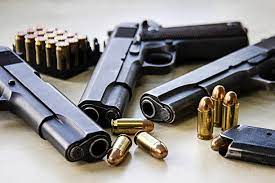

In [15]:
#GENERATE LABELS

labels,thershold = detect_moderation_label(image_path="/home/dataslush/Downloads/gun.jpeg",
                                             safe_flag=safe_flag,
                                             flags_map=flags_map,
                                             threshold=0.98)

print(labels)
Image.open('/home/dataslush/Downloads/gun.jpeg')

EXPLICIT NUDITY & SUGGESTIVE


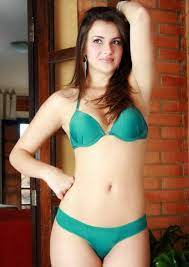

In [14]:
#GENERATE LABELS

labels,thershold = detect_moderation_label(image_path="/home/dataslush/Downloads/images.jpeg",
                                             safe_flag=safe_flag,
                                             flags_map=flags_map,
                                             threshold=0.98)

print(labels)
Image.open('/home/dataslush/Downloads/images.jpeg')